In [88]:
import numpy as np
import pandas as pd 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [89]:
closed_deals = pd.read_csv('/kaggle/input/marketing-funnel-olist/olist_closed_deals_dataset.csv')
mql = pd.read_csv('/kaggle/input/marketing-funnel-olist/olist_marketing_qualified_leads_dataset.csv')

# Closed Deals Dataset

In [90]:
closed_deals.head()
closed_deals.info()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

**Won Date**

In [91]:
# convert object into datetime
closed_deals['won_date'] = pd.to_datetime(closed_deals['won_date'], format='%Y-%m-%d %X')

**Business Segment**

In [92]:
# adding 'unknown category'
closed_deals.loc[closed_deals['business_segment'].isna(),'business_segment'] = 'unknown'
closed_deals['business_segment'].value_counts()

home_decor                         105
health_beauty                       93
car_accessories                     77
household_utilities                 71
construction_tools_house_garden     69
audio_video_electronics             64
computers                           34
pet                                 30
food_supplement                     28
food_drink                          26
sports_leisure                      25
bed_bath_table                      22
bags_backpacks                      22
toys                                20
fashion_accessories                 19
home_office_furniture               14
stationery                          13
phone_mobile                        13
small_appliances                    12
handcrafted                         12
baby                                10
books                                9
music_instruments                    9
watches                              8
jewerly                              8
home_appliances          

**Lead Type**

In [93]:
closed_deals['lead_type'].value_counts()

# adding 'unknown' category for null value rows
closed_deals.loc[closed_deals['lead_type'].isna(),'lead_type'] = 'unknown'

online_medium      332
online_big         126
industry           123
offline            104
online_small        77
online_beginner     57
online_top          14
other                3
Name: lead_type, dtype: int64

**Average Stock**

In [94]:
print('Before...')
closed_deals['average_stock'].value_counts()

# let's treat NaN values as 'unknown' category
closed_deals.loc[closed_deals['average_stock'].isna(),'average_stock'] = 'unknown'

print('After...')
closed_deals['average_stock'].value_counts()

Before...


5-20       22
50-200     15
1-5        10
20-50       8
200+        7
unknown     4
Name: average_stock, dtype: int64

After...


unknown    780
5-20        22
50-200      15
1-5         10
20-50        8
200+         7
Name: average_stock, dtype: int64

**Lead Behaviour Profile**

In [95]:
closed_deals['lead_behaviour_profile'].value_counts()

cat            407
eagle          123
wolf            95
shark           24
cat, wolf        8
eagle, cat       3
eagle, wolf      3
shark, cat       1
shark, wolf      1
Name: lead_behaviour_profile, dtype: int64

It doesn't make much sense if we treat 'cat' and 'cat, wolf' as two separate categories. To solve this, since there are only 4 behaviour (cat, eagle, wold, shark), I'm going to one hot each of them and add another column for unknown values. Rows that are currently with two or more values are going to be separated into one hot values.

In [96]:
lead_behaviour = pd.get_dummies(closed_deals['lead_behaviour_profile'], dummy_na=True)
lead_behaviour = lead_behaviour.rename(columns=str).rename(columns={'nan': 'unknown'})
for col in lead_behaviour.columns:
    categories = col.split(',')
    
    # splitting one multiple categories column into two
    for category in categories:
        lead_behaviour[category.strip()][lead_behaviour[category.strip()]==1] = 1
    
    # dropping columns with more than 1 categories
    
    if len(categories) > 1:
        lead_behaviour = lead_behaviour.drop(col, axis=1)

lead_behaviour = lead_behaviour.add_prefix('lead_behaviour_')

closed_deals = pd.concat([closed_deals, lead_behaviour], axis=1)
closed_deals = closed_deals.drop('lead_behaviour_profile', axis=1)
closed_deals.info()
closed_deals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    object        
 4   won_date                       842 non-null    datetime64[ns]
 5   business_segment               842 non-null    object        
 6   lead_type                      842 non-null    object        
 7   has_company                    63 non-null     object        
 8   has_gtin                       64 non-null     object        
 9   average_stock                  842 non-null    object        
 10  business_type                  832 non-null    object        
 11  declared_product_ca

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,lead_behaviour_cat,lead_behaviour_eagle,lead_behaviour_shark,lead_behaviour_wolf,lead_behaviour_unknown
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,NaN,NaN,unknown,reseller,NaN,0.0,1,0,0,0,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,NaN,NaN,unknown,reseller,NaN,0.0,0,1,0,0,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,NaN,NaN,unknown,reseller,NaN,0.0,1,0,0,0,0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,unknown,reseller,NaN,0.0,0,0,0,0,1
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,NaN,NaN,unknown,manufacturer,NaN,0.0,0,0,0,1,0


**Has Company**

In [97]:
# create 'unknown' category
closed_deals.loc[closed_deals['has_company'].isna(),'has_company'] = 'unknown'
closed_deals['has_company'].value_counts()

unknown    779
True        58
False        5
Name: has_company, dtype: int64

**Has gtin**

In [98]:
# create 'unknown' category
closed_deals.loc[closed_deals['has_gtin'].isna(), 'has_gtin'] = 'unknown'
closed_deals['has_gtin'].value_counts()

unknown    778
True        54
False       10
Name: has_gtin, dtype: int64

**Business type**

In [99]:
# create 'unknown' category
closed_deals.loc[closed_deals['business_type'].isna(), 'business_type'] = 'unknown'
closed_deals['business_type'].value_counts()

reseller        587
manufacturer    242
unknown          10
other             3
Name: business_type, dtype: int64

**Declared Product Catalog Size**

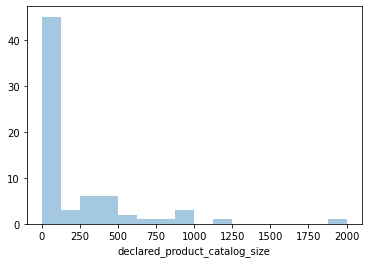

In [100]:
catalog_size = closed_deals.loc[closed_deals['declared_product_catalog_size'].notna(),'declared_product_catalog_size']
import seaborn as sns
sns.distplot(catalog_size, kde=False)

In [101]:
catalog_size.describe()
catalog_size.median()

count      69.000000
mean      233.028986
std       352.380558
min         1.000000
25%        30.000000
50%       100.000000
75%       300.000000
max      2000.000000
Name: declared_product_catalog_size, dtype: float64

100.0

I'm going to impute values for the missing values and add another column to indicate which row was having missing value for this Series.
Since the distribution is significantly skewed to the right, imputing in the average would inaccurately represent the missing value. Therefore, I'm going to use its median.
However, I'm going to keep the data like this for EDA. Imputation is going to be used later when preparing for the models.

**Check Row Duplicates**

In [114]:
a = closed_deals.columns
len(closed_deals.groupby(list(a)))

842

Use groupby to group accross all columns to group duplicated rows together. If the total number of rows remains the same, no row is duplicated.
As we observed, the total row is still 842 after using groupby. Therefore, no row was duplicated.

# Marketing Qualified Leads Dataset

In [103]:
mql.info()
mql['origin'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

It makes sense to treat NaN origins the same as the 'unknown' category that is already in the dataset.

In [104]:
mql['origin'][mql['origin'].isna()] = 'unknown'
mql.info()
mql['origin'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              8000 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


organic_search       2296
paid_search          1586
social               1350
unknown              1159
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

# **Output**

In [111]:
closed_deals.info()
closed_deals.to_csv('cleaned_closed_deals_dataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    object        
 4   won_date                       842 non-null    datetime64[ns]
 5   business_segment               842 non-null    object        
 6   lead_type                      842 non-null    object        
 7   has_company                    842 non-null    object        
 8   has_gtin                       842 non-null    object        
 9   average_stock                  842 non-null    object        
 10  business_type                  842 non-null    object        
 11  declared_product_ca

In [112]:
mql.info()
mql.to_csv('cleaned_marketing_qualified_leads.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              8000 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


**Check row deplicates**

In [115]:
a = mql.columns
len(mql.groupby(list(a)))

8000

No duplicates